<a href="https://colab.research.google.com/github/reyllama/TTIO/blob/master/03_StockEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn, optim
from torch.autograd import Variable

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [114]:
path = "/content/drive/My Drive/cor1.csv"
df = pd.read_csv(path)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stock_id,30,327,1689,1799,2000,2005,2250,2550,3419,3450,3465,3470,3475,3480,3490,3495,3520,3530,3535,3540,3545,3547,3550,3555,3560,3570,3580,3610,3620,3650,3670,3680,3690,3720,3780,3800,3830,3850,3920,...,190510,191410,191420,192080,192250,192390,192400,192410,192440,192820,193250,194370,194480,194510,195990,196170,196450,196490,196700,198440,200130,200230,200470,200670,200710,200780,200880,203650,203690,204320,204620,900070,900080,900100,900110,900120,900140,900250,950110,950130
0,30,1.000000,0.011155,0.201027,0.185411,0.403821,0.147761,0.320777,-0.055146,0.200041,0.455136,-0.245346,0.611180,0.355428,0.450279,0.487945,0.262783,0.103392,0.582332,0.140706,0.356966,0.561972,0.379465,0.345589,0.152476,0.133367,0.176408,0.038733,0.369335,0.349648,0.215639,0.191976,0.147429,0.170449,0.291783,-0.076510,0.184278,0.265794,0.001186,0.046936,...,0.235458,0.121438,0.220237,0.164520,0.319956,0.351550,0.292122,0.179553,0.027783,0.216018,0.087710,-0.162689,0.089602,0.344678,0.168196,0.096047,-0.034528,0.270931,0.284033,-0.230821,0.206654,-0.321791,0.159521,0.051553,0.241971,0.311742,0.246694,0.075517,0.201026,0.056275,0.233987,0.217521,0.223244,0.213036,0.161116,0.380705,0.291457,0.051574,0.363021,0.258626
1,327,0.011155,1.000000,0.117220,0.382672,0.164376,0.163725,0.301421,0.342141,0.181059,0.088540,0.032255,0.251268,0.244901,0.122071,0.147472,0.457990,0.127736,0.209087,0.100607,0.143576,0.078729,0.233178,0.251583,0.140265,0.318735,0.097713,0.064205,0.154730,0.229516,0.048586,0.111448,0.157336,0.283345,0.112621,0.125102,-0.052926,0.219964,0.258995,0.080788,...,0.108187,-0.109428,0.290169,0.174979,0.199806,0.171453,0.203335,0.152852,0.192651,0.029010,0.117452,-0.113367,0.283678,0.215003,0.311951,0.179811,0.069482,0.118957,0.141885,-0.188818,0.072904,-0.142184,0.295741,0.386034,0.074293,0.221597,0.058989,-0.162071,0.099101,0.097743,-0.121956,0.003032,0.096662,-0.004274,0.057893,0.198034,0.155426,0.229235,-0.020432,0.111403
2,1689,0.201027,0.117220,1.000000,0.110294,0.098427,-0.055022,0.293158,0.096079,0.310160,0.107500,-0.021389,0.245328,0.109819,0.065225,0.036473,-0.000017,0.130161,0.305708,0.020325,0.389962,0.331304,0.302368,0.175805,-0.011398,0.074997,-0.212814,-0.039597,0.188627,0.128325,0.074514,0.290831,0.110065,0.037216,0.214094,0.053922,0.104933,0.120816,0.267606,-0.028570,...,0.040764,0.111884,0.181110,0.203438,0.453371,0.290278,0.145346,0.426365,0.081846,0.026216,0.001880,-0.181705,0.103640,0.220889,-0.032787,0.166704,0.093756,0.034939,0.401619,-0.121568,0.140397,0.053163,0.352899,0.401150,0.212610,0.169265,0.249084,0.085672,0.154180,0.342910,0.340621,0.070107,0.238974,0.305009,0.143519,0.140801,0.286873,0.192656,0.224018,0.106187
3,1799,0.185411,0.382672,0.110294,1.000000,0.073110,0.105696,0.300906,0.235907,0.046493,0.180074,0.011890,0.286876,0.206879,0.226946,0.201475,0.263916,0.082602,0.425832,0.197893,0.273567,0.252671,0.327792,0.505525,0.303872,0.292163,0.099744,-0.007510,0.340838,0.230883,0.217860,0.111147,0.221022,0.177630,0.043660,0.162934,0.249357,0.235966,0.119353,0.018328,...,0.212532,0.063340,0.326637,0.236350,0.268093,0.174891,0.125137,0.193039,0.150290,0.061868,0.007409,-0.036896,0.220774,0.299181,0.307908,0.080340,-0.070149,0.289098,0.086074,-0.166538,0.155509,-0.129195,0.289257,0.270318,0.316581,0.334308,0.246385,0.014482,0.146265,0.018227,-0.053530,0.099265,0.186708,0.188976,0.248677,0.259320,0.334698,0.304990,0.069156,0.186461
4,2000,0.403821,0.164376,0.098427,0.073110,1.000000,0.109480,0.182644,0.198117,0.240602,0.362854,-0.260305,0.541781,0.387298,0.357070,0.344869,0.136978,0.123103,0.490808,-0.005824,0.324965,0.463163,0.386801,0.073759,-0.033604,0.310487,0.181452,0.040864,0.209307,0.179509,0.209955,0.253569,0.057288,0.206928,0.180457,0.025118,0.312687,0.200072,0.240845,0.105246,...,0.190485,0.057588,0.200571,0.010201,0.266066,0.199991,0.200131,0.311851,0.304193,0.025356,0.081951,-0.220532,0.186528,0.022147,0.177595,0.204020,-0.073660,0.341640,0.212572,0.142613,0.119965,-0.248074,0.133008,0.260989,-0.011608,0.3

In [115]:
df = df.set_index(keys='stock_id')
df.head()

,30,327,1689,1799,2000,2005,2250,2550,3419,3450,3465,3470,3475,3480,3490,3495,3520,3530,3535,3540,3545,3547,3550,3555,3560,3570,3580,3610,3620,3650,3670,3680,3690,3720,3780,3800,3830,3850,3920,3925,...,190510,191410,191420,192080,192250,192390,192400,192410,192440,192820,193250,194370,194480,194510,195990,196170,196450,196490,196700,198440,200130,200230,200470,200670,200710,200780,200880,203650,203690,204320,204620,900070,900080,900100,900110,900120,900140,900250,950110,950130
stock_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
30,1.000000,0.011155,0.201027,0.185411,0.403821,0.147761,0.320777,-0.055146,0.200041,0.455136,-0.245346,0.611180,0.355428,0.450279,0.487945,0.262783,0.103392,0.582332,0.140706,0.356966,0.561972,0.379465,0.345589,0.152476,0.133367,0.176408,0.038733,0.369335,0.349648,0.215639,0.191976,0.147429,0.170449,0.291783,-0.076510,0.184278,0.265794,0.001186,0.046936,-0.129388,...,0.235458,0.121438,0.220237,0.164520,0.319956,0.351550,0.292122,0.179553,0.027783,0.216018,0.087710,-0.162689,0.089602,0.344678,0.168196,0.096047,-0.034528,0.270931,0.284033,-0.230821,0.206654,-0.321791,0.159521,0.051553,0.241971,0.311742,0.246694,0.075517,0.201026,0.056275,0.233987,0.217521,0.223244,0.213036,0.161116,0.380705,0.291457,0.051574,0.363021,0.258626
327,0.011155,1.000000,0.117220,0.382672,0.164376,0.163725,0.301421,0.342141,0.181059,0.088540,0.032255,0.251268,0.244901,0.122071,0.147472,0.457990,0.127736,0.209087,0.100607,0.143576,0.078729,0.233178,0.251583,0.140265,0.318735,0.097713,0.064205,0.154730,0.229516,0.048586,0.111448,0.157336,0.283345,0.112621,0.125102,-0.052926,0.219964,0.258995,0.080788,0.327301,...,0.108187,-0.109428,0.290169,0.174979,0.199806,0.171453,0.203335,0.152852,0.192651,0.029010,0.117452,-0.113367,0.283678,0.215003,0.311951,0.179811,0.069482,0.118957,0.141885,-0.188818,0.072904,-0.142184,0.295741,0.386034,0.074293,0.221597,0.058989,-0.162071,0.099101,0.097743,-0.121956,0.003032,0.096662,-0.004274,0.057893,0.198034,0.155426,0.229235,-0.020432,0.111403
1689,0.201027,0.117220,1.000000,0.110294,0.098427,-0.055022,0.293158,0.096079,0.310160,0.107500,-0.021389,0.245328,0.109819,0.065225,0.036473,-0.000017,0.130161,0.305708,0.020325,0.389962,0.331304,0.302368,0.175805,-0.011398,0.074997,-0.212814,-0.039597,0.188627,0.128325,0.074514,0.290831,0.110065,0.037216,0.214094,0.053922,0.104933,0.120816,0.267606,-0.028570,-0.023287,...,0.040764,0.111884,0.181110,0.203438,0.453371,0.290278,0.145346,0.426365,0.081846,0.026216,0.001880,-0.181705,0.103640,0.220889,-0.032787,0.166704,0.093756,0.034939,0.401619,-0.121568,0.140397,0.053163,0.352899,0.401150,0.212610,0.169265,0.249084,0.085672,0.154180,0.342910,0.340621,0.070107,0.238974,0.305009,0.143519,0.140801,0.286873,0.192656,0.224018,0.106187
1799,0.185411,0.382672,0.110294,1.000000,0.073110,0.105696,0.300906,0.235907,0.046493,0.180074,0.011890,0.286876,0.206879,0.226946,0.201475,0.263916,0.082602,0.425832,0.197893,0.273567,0.252671,0.327792,0.505525,0.303872,0.292163,0.099744,-0.007510,0.340838,0.230883,0.217860,0.111147,0.221022,0.177630,0.043660,0.162934,0.249357,0.235966,0.119353,0.018328,0.368914,...,0.212532,0.063340,0.326637,0.236350,0.268093,0.174891,0.125137,0.193039,0.150290,0.061868,0.007409,-0.036896,0.220774,0.299181,0.307908,0.080340,-0.070149,0.289098,0.086074,-0.166538,0.155509,-0.129195,0.289257,0.270318,0.316581,0.334308,0.246385,0.014482,0.146265,0.018227,-0.053530,0.099265,0.186708,0.188976,0.248677,0.259320,0.334698,0.304990,0.069156,0.186461
2000,0.403821,0.164376,0.098427,0.073110,1.000000,0.109480,0.182644,0.198117,0.240602,0.362854,-0.260305,0.541781,0.387298,0.357070,0.344869,0.136978,0.123103,0.490808,-0.005824,0.324965,0.463163,0.386801,0.073759,-0.033604,0.310487,0.181452,0.040864,0.209307,0.179509,0.209955,0.253569,0.057288,0.206928,0.180457,0.025118,0.312687,0.200072,0.240845,0.105246,0.083953,...,0.190485,0.057588,0.200571,0.010201,0.266066,0.199991,0.200131,0.311851,0.304193,0.025356,0.081951,-0.220532,

In [122]:
df.dropna(axis=1, how='all').isna().sum().sort_values()

30        16
000810    16
000760    16
000725    16
000720    16
          ..
235010    25
211270    25
36220     28
222110    28
51310     29
Length: 2038, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


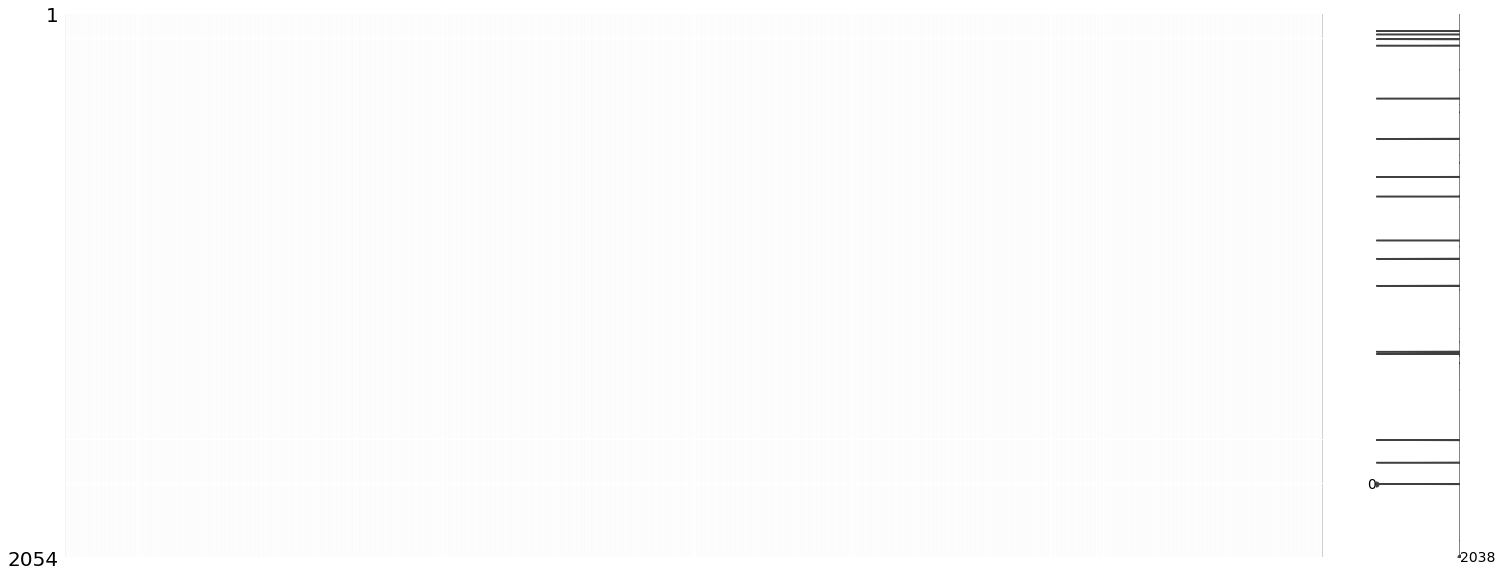

In [113]:
import missingno as msno
msno.matrix(df)

In [126]:
df2 = df.fillna(0)

In [9]:
dtype = torch.FloatTensor
epochs = 1
emb_dim = 32
embeddings = Variable(torch.randn(emb_dim, len(df)).type(dtype), requires_grad=True)
lr = 0.003
optimizer = optim.Adam([embeddings], lr=lr)

(2*np.abs(df.iloc[2,3])-1)

-0.7794110496683455

In [20]:
embeddings.shape

torch.Size([32, 2054])

In [34]:
torch.norm(embeddings[:, 3].view(32, -1) - embeddings, dim=0).shape

torch.Size([2054])

In [74]:
torch.matmul(, )

tensor([[nan]], grad_fn=<MmBackward>)

In [127]:
a = torch.from_numpy(np.abs(2*np.array(df2.iloc[:, 5]))-1).view(1, len(df2)).type(torch.FloatTensor)
a

tensor([[-0.7045, -0.6725, -0.8900,  ..., -0.4317, -0.8118, -0.7367]])

In [128]:
b = torch.norm(embeddings[:, 5].view(emb_dim, -1) - embeddings, dim=0).view(len(df2), 1)
b

tensor([[7.2805],
        [8.3499],
        [7.7525],
        ...,
        [8.5034],
        [8.2536],
        [9.1655]], grad_fn=<ViewBackward>)

In [143]:
embeddings[:, 5].view(32, -1)

tensor([[-0.8547],
        [ 0.4109],
        [ 1.1819],
        [ 0.6527],
        [ 0.2739],
        [-0.0523],
        [ 0.0059],
        [ 0.2100],
        [-1.3411],
        [-0.3755],
        [ 0.2434],
        [ 0.9673],
        [-0.6742],
        [-0.5940],
        [ 0.4973],
        [ 0.4544],
        [ 0.2550],
        [-0.7740],
        [ 1.0414],
        [ 0.8717],
        [ 0.0058],
        [-0.9376],
        [ 0.6838],
        [ 0.2195],
        [ 1.3506],
        [ 1.1099],
        [-0.7206],
        [ 1.3110],
        [-0.8682],
        [ 0.8132],
        [-2.2291],
        [ 0.8492]], grad_fn=<ViewBackward>)

In [145]:
embeddings

tensor([[ 0.1252,  0.4860,  1.9003,  ..., -0.2291, -0.0062,  1.8874],
        [ 1.2398, -0.4046,  0.5107,  ..., -0.5435,  0.2225,  0.5874],
        [-0.2573,  0.3407, -1.4097,  ...,  0.5052, -0.4893,  1.2718],
        ...,
        [ 0.2993, -1.7791,  0.2379,  ..., -0.1528,  0.0970, -1.2078],
        [ 1.4365,  0.1039,  0.0963,  ...,  1.1686,  0.2030,  0.1209],
        [ 0.2612, -0.2727, -0.7435,  ...,  0.0855, -1.2068,  0.4533]],
       requires_grad=True)

In [155]:
dtype = torch.FloatTensor
epochs = 15
emb_dim = 32
embeddings = Variable(torch.randn(emb_dim, len(df)).type(dtype), requires_grad=True)
lr = 0.003
optimizer = optim.Adam([embeddings], lr=lr)

for epoch in range(epochs):
  loss = 0
  print("{0}th epoch in process".format(epoch+1))
  for i in range(len(df)):
    v1 = embeddings[:, i].view(emb_dim, -1)
    dist = torch.norm(v1 - embeddings, dim=0).view(len(df2), 1)
    corrs = torch.from_numpy(np.abs(2*np.array(df2.iloc[:, i]))-1).view(1, len(df2)).type(torch.FloatTensor)
    loss += torch.mm(corrs, dist)/2

  optimizer.zero_grad()
  loss.backward(retain_graph=True)
  optimizer.step()

embeddings[:, 1]  

0th epoch in process
1th epoch in process
2th epoch in process
3th epoch in process
4th epoch in process
5th epoch in process
6th epoch in process
7th epoch in process
8th epoch in process
9th epoch in process
10th epoch in process
11th epoch in process
12th epoch in process
13th epoch in process
14th epoch in process


tensor([-0.7364, -0.4753,  0.5550, -0.8979, -2.1938, -2.4286, -2.1524,  0.7406,
        -1.2461, -0.5512,  0.0722,  0.7510,  0.2316, -0.7310, -0.0659, -0.3448,
        -0.5179, -1.4241,  0.3405,  0.0659,  0.7605,  0.1612,  0.7226,  0.4126,
        -0.1483, -0.8508,  0.4824, -0.8211, -0.5450,  2.0600, -0.8875,  0.7464],
       grad_fn=<SelectBackward>)

In [157]:
embeddings.shape

torch.Size([32, 2054])

In [160]:
embeddings

tensor([[ 0.1573, -0.7364, -0.9772,  ..., -1.7275,  2.2494,  0.9683],
        [-0.5165, -0.4753,  0.7162,  ..., -1.3688,  0.0543, -0.9814],
        [-0.8317,  0.5550,  0.6412,  ..., -0.1333,  0.3364,  1.0169],
        ...,
        [ 0.0988,  2.0600, -0.5659,  ..., -0.5301, -1.1387, -0.3880],
        [-2.2198, -0.8875,  0.4344,  ...,  1.5313,  0.4025, -0.5428],
        [-1.2067,  0.7464,  2.0851,  ...,  1.0867,  0.9121, -0.4803]],
       requires_grad=True)